In [63]:
import sys
sys.path.append('/Users/huibmeulenbelt/PycharmProjects/ufc/')
sys.path.append('/Users/huibmeulenbelt/PycharmProjects/ufc/scripts')
sys.path.append('/Users/huibmeulenbelt/PycharmProjects/ufc/scripts/markov')

In [64]:
import json
import numpy as np
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

In [65]:
from fight import Fight

In [66]:
PATH_G = '/Users/huibmeulenbelt/PycharmProjects/ufc/scripts/markov/tests/12098.json'
G = json_graph.adjacency_graph(json.load(open(PATH_G)))

In [67]:
n_rounds = 3
fight = Fight(G=G, n_rounds=n_rounds)

The goal is to compute the expected number of visits, $N_{i,j}(n)$ to each transient state $j$ over time steps $n \in \{0, 1, ..., k\}$, starting from transient state $i$. This is calculated using the geometric series of matrices

$$
N_{i,j}(n) = \sum_{n=0}^kQ^n = (I - Q^{n+1}\cdot(I-Q)^{-1}
$$

where $Q$ is the matrix that holds the probabilities of moving from a transient state to another transient state, $I$ is the identity matrix
and $Q^{n+1}$ is the matrix that represent the transition probabilities after $n + 1$ steps.

In [68]:
def number_of_visits(Q: np.ndarray, I: np.ndarray, k: int) -> np.ndarray:
    Qn_plus_1 = np.linalg.matrix_power(Q, k + 1)
    A = I - Qn_plus_1
    B = I - Q

    return np.linalg.solve(B, A)

In [69]:
N = number_of_visits(Q=fight.Q, I=fight.I, k=fight.n)

In [70]:
i = fight.i_striking_blue
n_strikes = N[:, 0, i]

In [71]:
n_strikes

array([[6.41768045, 0.77656381, 2.43851252, 0.1821524 ],
       [2.24959957, 1.77554298, 1.30699972, 0.39630757],
       [5.4959394 , 1.07507954, 1.96606085, 0.25376633],
       ...,
       [4.19424095, 1.14970793, 1.67335589, 0.13968272],
       [4.30132338, 1.10237428, 2.0230492 , 0.13115151],
       [2.72580925, 1.12785312, 1.68862585, 0.21250179]], shape=(4000, 4))

In [72]:
n_strikes_standing_head = n_strikes[:, 0]
n_strikes_ground_head   = n_strikes[:, 1]
n_strikes_standing_body = n_strikes[:, 2]
n_strikes_ground_body   = n_strikes[:, 3]

In [73]:
p_n_strikes = fight.p_N(j=fight.i_striking_blue, x=10)
# renormalize to sum of 1?

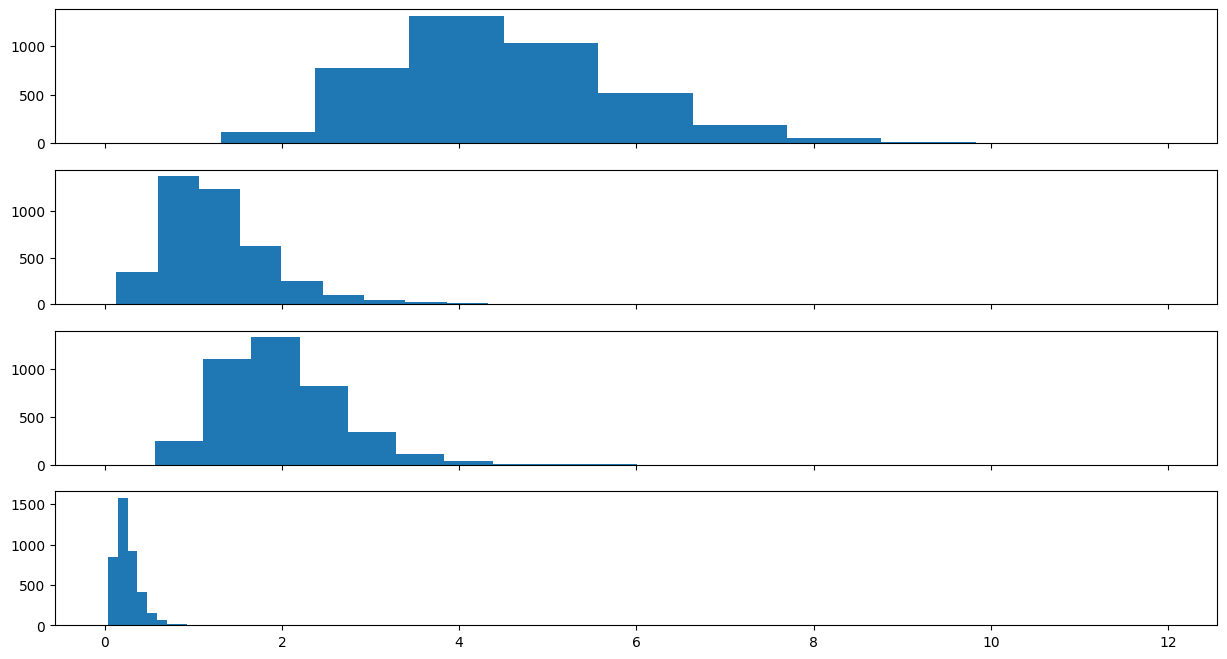

In [74]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(15, 8))
ax[0].hist(x=n_strikes_standing_head)
ax[1].hist(x=n_strikes_ground_head)
ax[2].hist(x=n_strikes_standing_body)
ax[3].hist(x=n_strikes_ground_body)
plt.show()